In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### Limitations of our dataset

There are no missing or distorted values in our dataset, as best we can tell. However, this dataset does not track the total population of the United States, the geographical population distribution, or the percent of the population/demographics of the sample of people surveyed at each time point, which would provide more information about relative popularity of a name in a given year than just the count. 5000 instances of a given name in 1870 is likely much more representative of a cultural trend than 5000 names in 2014. Similarly, it may be that some names are more popular within certain demographic groups. In this case, we may not see an important shift within a community (a city, a religious or ethnic group, etc.) because the subpopulation may be under sampled or because a given group represents a smaller portion of the total US populations. 

Additionally, though changes in name spellings may provide some information about culture, the lack of association between names that are phonetically and semantically identical (“Jaxon” and “Jaxson”, for example) within this dataset makes it difficult to group names that should perhaps be analyzed as the same “cultural unit”. This is also worth exploring in the context of adaptations of common names that are associated with certain cultural groups, particularly once the immigrant population of the United States began to increase (for example, even though “Mary” and “Maria” should likely be analyzed separately, they are translated versions of one name, and indicative of the same values and priorities within different communities).

### Initial Exploration

When first examining the national names dataset we wanted to find interesting patterns and trends that stood out. To this end, we did a preliminary examination of the structure of the distribution of names in the dataset. Below we display the top 10 male and female names (along with the top 10 overall for scale comparison). We also display the frequency distribution of the top 500 names - as we can see, the system follows a distribution with exponential dropoff.

James is the most popular name in the US, although the next 5 most common male names (John, Robert, Michael, William, and David) have similar frequencies. Mary is by far the most common girl’s name, and is nearly 3 times as popular over time as the next most common female name. We were surprised to see that 9 of the top 10 most common names are male, and that the most common girl’s name is only the 5th most common name overall. Since on average there should be equal numbers of male and female babies born each year, this either points to a greater diversity in female names than male names over time, or to some degree of sampling bias. 

It appears that name diversity has increased overtime, as indicated by the figure below. While the top 100 names are consistently far more represented than other names over time, the buckets containing the next 4 sets of 100 most common names have increased their frequency in the last half century, pointing to a more diverse naming tradition with more equal distribution across the top 500 most common names in the last century.

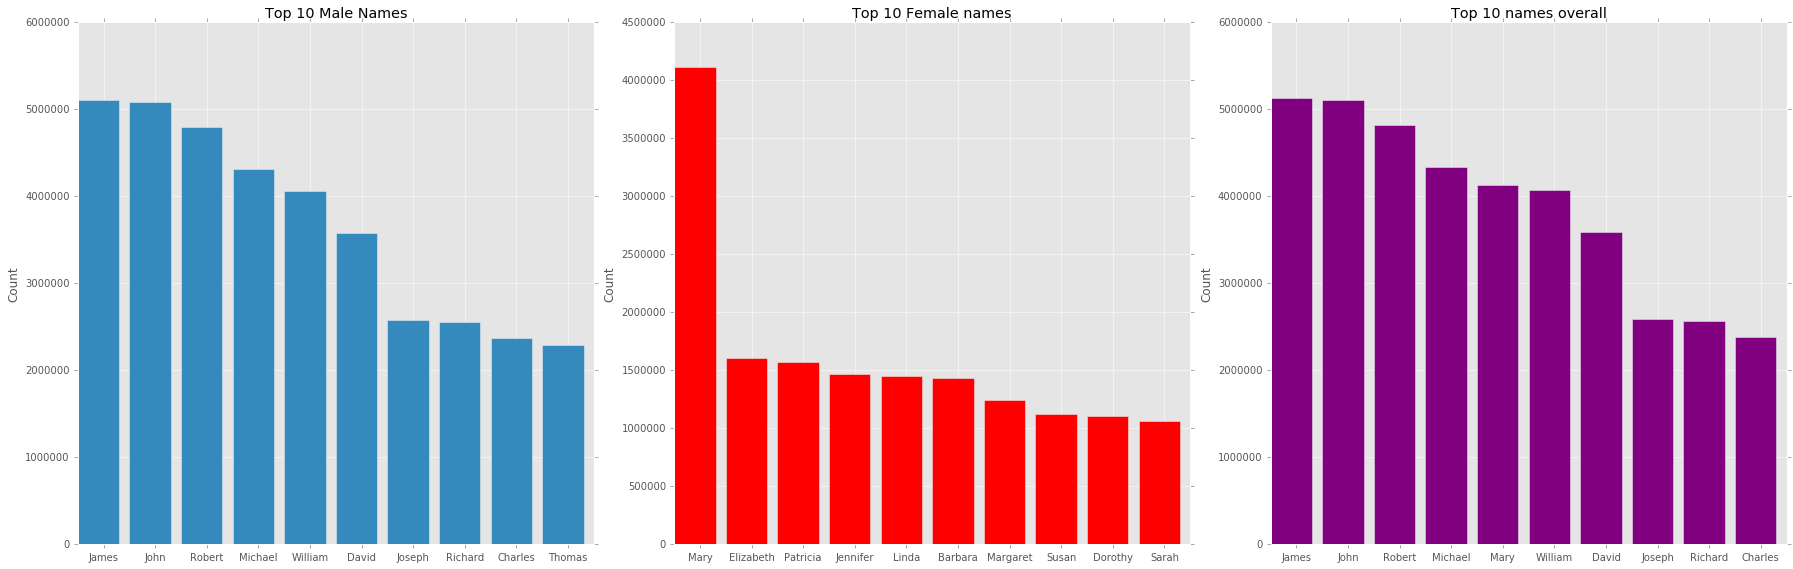

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

df = pd.read_csv('data/NationalNames.csv')

name_to_ratio = {}

for name, row in df[df['Year'] == 1945].groupby(["Name", "Gender"], as_index=False).sum().groupby(["Name"]):
    if len(row) == 2:
        female, male = row.iloc[0, :], row.iloc[1, :]
        name_to_ratio[female["Name"]] = np.abs(1 - 1. * female['Count'] / male['Count'])

names = sorted(name_to_ratio, key=name_to_ratio.get, reverse=False)

top_10_all = df.groupby(['Name'])['Count'].sum().sort_values(ascending=False)[:10]
top_10_female = df[df['Gender'] == 'F'].groupby(['Name'])['Count'].sum().sort_values(ascending=False)[:10]
top_10_male = df[df['Gender'] == 'M'].groupby(['Name'])['Count'].sum().sort_values(ascending=False)[:10]

fig = plt.figure(figsize=(25, 8))

ax1 = fig.add_subplot(1, 3, 1)
ax1.bar(xrange(10), top_10_male.values)
ax1.set_xticks(np.arange(0.5, 10.5, 1))
ax1.set_xticklabels(top_10_male.index)
ax1.set_title('Top 10 Male Names')
ax1.set_ylabel('Count')

ax2 = fig.add_subplot(1, 3, 2)
ax2.bar(xrange(10), top_10_female.values, color='r')
ax2.set_xticks(np.arange(0.5, 10.5, 1))
ax2.set_xticklabels(top_10_female.index)
ax2.set_title('Top 10 Female names')
ax2.set_ylabel('Count')

ax3 = fig.add_subplot(1, 3, 3)
ax3.bar(xrange(10), top_10_all.values, color='purple')
ax3.set_xticks(np.arange(0.5, 10.5, 1))
ax3.set_xticklabels(top_10_all.index)
ax3.set_title('Top 10 names overall')
ax3.set_ylabel('Count')

fig.tight_layout()

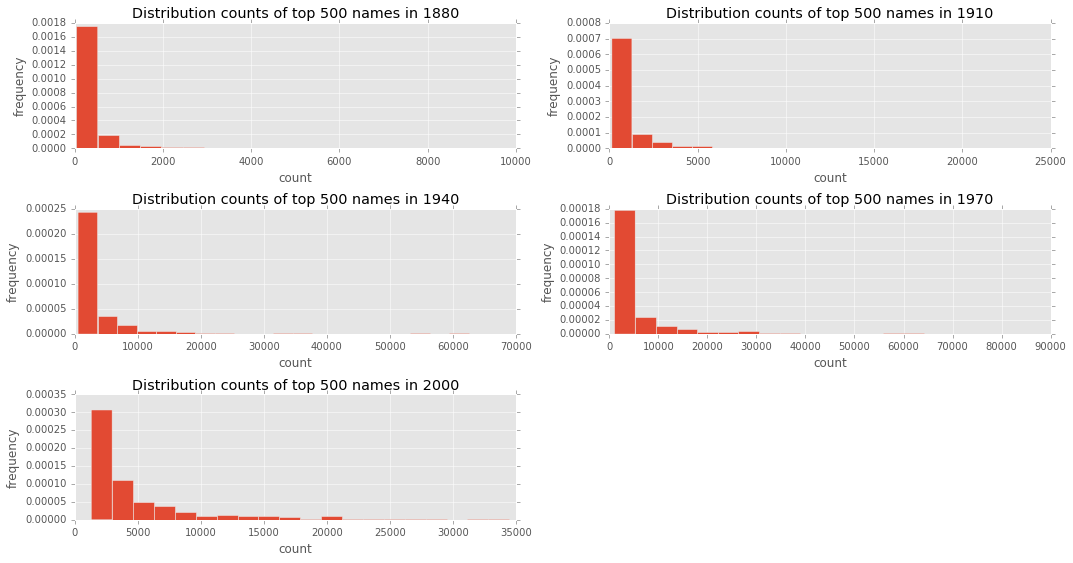

In [3]:
fig = plt.figure(figsize=(15, 10))

def generate_name_distribution_hist(year, ax):
    data = df[df['Year'] == year].sort_values('Count', ascending=False)['Count'].values[:500]
    
    ax.hist(data, bins=20, normed=True)
    ax.set_title('Distribution counts of top 500 names in %d' % year)
    ax.set_ylabel('frequency')
    ax.set_xlabel('count')
    
count = 1

for year in xrange(1880, 2020, 30):
    ax = fig.add_subplot(4, 2, count)
    generate_name_distribution_hist(year, ax)
    count = count + 1

fig.tight_layout()

We can also examine the trends in the frequency of some of the most popular names over time. As we can see most of these names have experienced severe dropoff in popularity. 

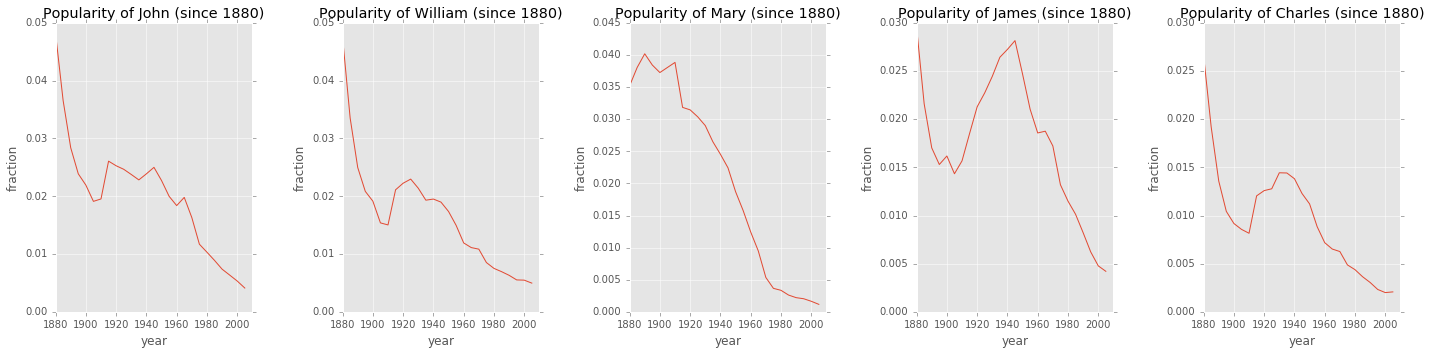

In [4]:
start_year= 1880
end_year = 2010
names = df[df['Year'] == start_year].groupby(['Name'])['Count'].sum().sort_values(ascending=False).head(n=5).index

def names_trends(start_year, names, diff):
    end_year = 2010
    years = xrange(start_year, end_year, diff)

    #for year in xrange(1880, 2020, 30):
        #top_10 = df[df['Year'] == year].groupby(['Name'])['Count'].sum().sort_values(ascending=False).head(n=10)

    fig = plt.figure(figsize=(20, 5))
    count = 1

    for name in names:
        ax = fig.add_subplot(1, 5, count)
        counts = []
        for year in years:
            pop = df[df['Year'] == year]['Count'].sum()
            counts.append(1. * df[df['Year'] == year][df['Name'] == name]['Count'].sum() / pop)

        counts = np.array(counts)

        ax.plot(years, counts)
        ax.set_xlabel('year')
        ax.set_ylabel('fraction')
        ax.set_xlim(start_year, 2010)
        ax.set_title('Popularity of %s (since %d)' % (name, years[0]))

        count = count + 1

    fig.tight_layout()
    
names_trends(1880, names, 5)


We also examine trends of other interesting names below. Kevin has unfortunately been on the downturn since the 1960s but Adriana and Hajar are increasing in popularity.

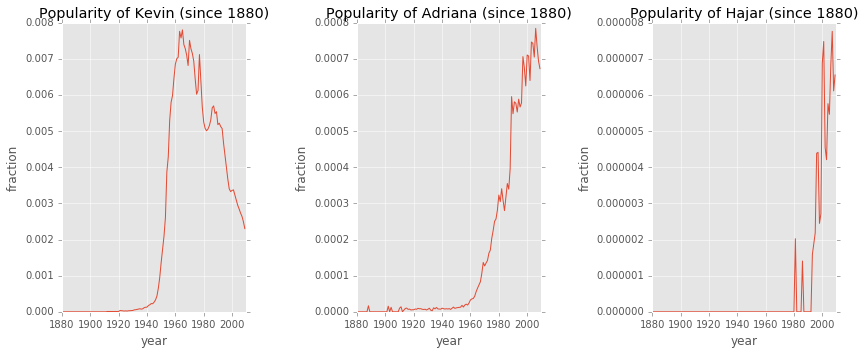

In [5]:
names_trends(1880, ['Kevin', 'Adriana', 'Hajar'], 1)

We also examine the popularity of '-ayden' names, names that have recently increased in popularity recently accordin to intuition. This intuition turns out to be correct.

names_trends(1880, ['Aiden', 'Jayden', 'Ayden', 'Jaxon', 'Kayden'], 5)

Jase is the name with the greatest percent change, and has increased in popularity 74,580% since 1980, from 5 instances in 1980 to 3734 in 2014. Tamika has had the greatest decrease, going down 99.61% between 1980 and 2014 (which had 1285 and 5 occurrences, respectively). Although instances of Jase have consistently increased over time, it appears Tamika had a spike in popularity between the mid 1960s and mid 1980s, and is now very unusual.

Jaxon, Harper, Paisley, Greyson, and Declan also saw large percent increases during this time period, while Latasha, Lakeisha, Tasta, Tonya, Latisha, and Latonya saw the highest decreases after Tamika.


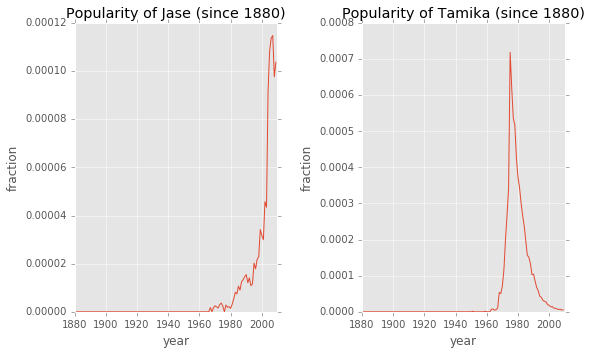

In [6]:
names_trends(1880, ['Jase', 'Tamika'], 1)

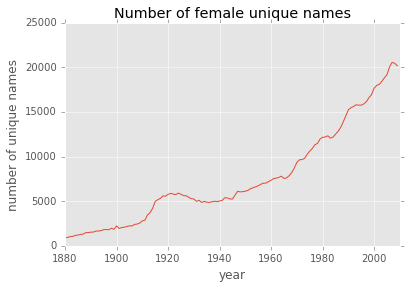

In [7]:
nums = []


for year in xrange(1880, 2010, 1):
    nums.append(len(df[(df['Year'] == year) & (df['Gender'] == 'F')]['Name'].drop_duplicates()))
    
plt.plot(xrange(1880, 2010, 1), nums)
plt.title('Number of female unique names')
plt.xlabel('year')
plt.ylabel('number of unique names')

_ = plt.xlim(1880, 2010)



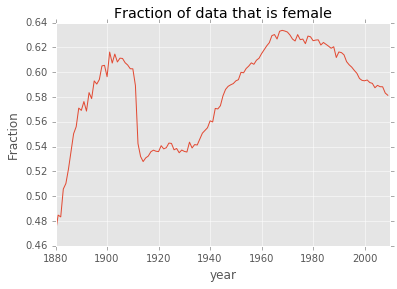

In [8]:
nums = []

for year in xrange(1880, 2010, 1):
    nums.append(1. * df[(df["Gender"] == 'F') & (df['Year'] == year)].shape[0] / df[df['Year'] == year].shape[0])
    
nums=np.array(nums)
    
plt.plot(xrange(1880, 2010, 1), nums)
plt.title('Fraction of data that is female')
plt.xlabel('year')
plt.ylabel('Fraction')

_ = plt.xlim(1880, 2010)